In [ ]:
#list all the files in the directory
import os
import re

port = 'COCHIN'
port_data_path = r'C:\Users\HP\Documents\GitHub\Tidal_Project\Datasets\COCHIN MSL DATA 1886_2022'

output_path = r'C:\Users\HP\Documents\GitHub\Tidal_Project\Output'
dir_list = os.listdir(port_data_path)
# print(dir_list)

filtered_files1 = [file for file in dir_list if re.match(r'COCHIN\.H\d{4}$', file)]
filtered_files2 = [file for file in dir_list if re.match(r'COCHIN\d{4}$', file)]
filtered_files = filtered_files1 + filtered_files2
print(filtered_files)

['VISAKHA.H1953', 'VISAKHA.H1954', 'VISAKHA.H1955', 'VISAKHA.H1957', 'VISAKHA.H1959', 'VISAKHA.H1960', 'VISAKHA.H1961', 'VISAKHA.H1963', 'VISAKHA.H1964', 'VISAKHA.H1965', 'VISAKHA.H1966', 'VISAKHA.H1967', 'VISAKHA.H1968', 'VISAKHA.H1970', 'VISAKHA.H1971', 'VISAKHA.H1972', 'VISAKHA.H1973', 'VISAKHA.H1974', 'VISAKHA.H1975', 'VISAKHA.H1976', 'VISAKHA.H1977', 'VISAKHA.H1978', 'VISAKHA.H1979', 'VISAKHA.H1980', 'VISAKHA.H1981', 'VISAKHA.H1982', 'VISAKHA.H1983', 'VISAKHA.H1984', 'VISAKHA.H1985', 'VISAKHA.H1986', 'VISAKHA.H1987', 'VISAKHA.H1988', 'VISAKHA.H1989', 'VISAKHA.H1990', 'VISAKHA.H1991', 'VISAKHA.H1992', 'VISAKHA.H1993', 'VISAKHA.H1994', 'VISAKHA.H1995', 'VISAKHA.H1996', 'VISAKHA.H1997', 'VISAKHA.H1999', 'VISAKHA.H2000', 'VISAKHA.H2001', 'VISAKHA.H2004', 'VISAKHA.H2005', 'VISAKHA.H2006', 'VISAKHA.H2007', 'VISAKHA.H2008', 'VISAKHA.H2009', 'VISAKHA.H2010', 'VISAKHA.H2011', 'VISAKHA.H2012', 'VISAKHA.H2013', 'VISAKHA.H2014', 'VISAKHA.H2016', 'VISAKHA.H2017', 'VISAKHA.H2018', 'VISAKHA.H201

In [2]:
from collections import OrderedDict

filtered_file_paths = {
    year: fr"{port_data_path}\{file}"
    for file in filtered_files
    if (year := int(file[-4:]))
}

filtered_file_paths = OrderedDict(sorted(filtered_file_paths.items()))

print(filtered_file_paths)


OrderedDict({1953: 'C:\\Users\\HP\\Documents\\GitHub\\Tidal_Project\\Datasets\\VISAKHA MSL DATA 1953_2023\\VISAKHA.H1953', 1954: 'C:\\Users\\HP\\Documents\\GitHub\\Tidal_Project\\Datasets\\VISAKHA MSL DATA 1953_2023\\VISAKHA.H1954', 1955: 'C:\\Users\\HP\\Documents\\GitHub\\Tidal_Project\\Datasets\\VISAKHA MSL DATA 1953_2023\\VISAKHA.H1955', 1957: 'C:\\Users\\HP\\Documents\\GitHub\\Tidal_Project\\Datasets\\VISAKHA MSL DATA 1953_2023\\VISAKHA.H1957', 1959: 'C:\\Users\\HP\\Documents\\GitHub\\Tidal_Project\\Datasets\\VISAKHA MSL DATA 1953_2023\\VISAKHA.H1959', 1960: 'C:\\Users\\HP\\Documents\\GitHub\\Tidal_Project\\Datasets\\VISAKHA MSL DATA 1953_2023\\VISAKHA.H1960', 1961: 'C:\\Users\\HP\\Documents\\GitHub\\Tidal_Project\\Datasets\\VISAKHA MSL DATA 1953_2023\\VISAKHA.H1961', 1963: 'C:\\Users\\HP\\Documents\\GitHub\\Tidal_Project\\Datasets\\VISAKHA MSL DATA 1953_2023\\VISAKHA.H1963', 1964: 'C:\\Users\\HP\\Documents\\GitHub\\Tidal_Project\\Datasets\\VISAKHA MSL DATA 1953_2023\\VISAKHA.H1964

In [3]:
import os
import re
import pandas as pd
import calendar
from datetime import datetime, timedelta

def parse_wave_heights(file_path, yearnum):
    """
    Parses the wave height file for the given year.
    
    If the file exists, it reads the file and assigns sequential dates (starting January 1).
    If the file does not exist, it creates rows for each day of the year (accounting for leap years)
    with all hourly values set to None.
    
    Each row contains a date string and 24 hourly wave height values.
    """
    data = []
    
    # Start date is January 1 of the given year.
    start_date = datetime(yearnum, 1, 1)
    
    # If file doesn't exist, populate data for each day of the year with None.
    if not os.path.exists(file_path):
        print(f"File '{file_path}' does not exist. Populating data for {yearnum} with no values.")
        total_days = 366 if calendar.isleap(yearnum) else 365
        for i in range(total_days):
            current_date = start_date + timedelta(days=i)
            row = [current_date.strftime('%Y-%m-%d')] + [None] * 24
            data.append(row)
        return data
    
    # If the file exists, open and process it.
    if file_path[-5] == 'H':
        with open(file_path, 'r') as file:
            lines = file.readlines()
        
        data_started = False
        current_date = start_date
        for line in lines:
            # Look for the marker that indicates the data rows have started.
            if 'DAYS' in line:
                data_started = True
                continue
            # Process only lines after the header that don't start with a separator.
            if data_started and not line.startswith('-'):
                # Preprocess the line: add a space before a minus sign that immediately follows a digit.
                line = re.sub(r'(\d)-', r'\1 -', line)
                parts = line.split()
                if parts:
                    day = parts[0]
                    # Only process if the day is a digit.
                    if day.isdigit():
                        # If for some reason we read more rows than there are days in the year, break out.
                        if current_date.year != yearnum:
                            break
                        # Process the 24 hourly values.
                        heights = []
                        for i in range(1, 25):
                            if i < len(parts):
                                try:
                                    height = float(parts[i])
                                except ValueError:
                                    height = None
                            else:
                                height = None
                            heights.append(height)
                        data.append([current_date.strftime('%Y-%m-%d')] + heights)
                        current_date += timedelta(days=1)
    else:
        with open(file_path, 'r') as file:
            lines = file.readlines()
                 # Skip metadata lines
            lines = lines[3:]  # Assuming first three lines are metadata
            
            current_date = start_date
            for line in lines:
                line = line.strip()
                
                if len(line) >= 72:  # Ensuring we have at least 24 values (each 3 digits)
                    heights = [int(line[i:i+3])/100 for i in range(0, 72, 3)]  # Extract 3-digit groups
                    data.append([current_date.strftime('%Y-%m-%d')] + heights)
                    current_date += timedelta(days=1)
                
                elif line == 900: # No data recorded for the day
                    heights = [None] * 24 
                    data.append([current_date.strftime('%Y-%m-%d')] + heights)
                    current_date += timedelta(days=1)
        
    return data

def data_to_excel(all_data, output_file):
    """
    Converts the combined list of rows into a pandas DataFrame and writes it to an Excel file.
    The first column is 'Date' and the next 24 columns are H1, H2, ..., H24.
    """
    columns = ['Date'] + [f'H{i}' for i in range(1, 25)]
    df = pd.DataFrame(all_data, columns=columns)
    
    # Write DataFrame to Excel. This will overwrite any existing file.
    df.to_excel(output_file, index=False)
    print(f"Data successfully exported to {output_file}")

# ---------------
# Main Execution
# ---------------

# This list will hold data for all years.
all_data = []

# Process each year specified in the dictionary.
for year, file_path in filtered_file_paths.items():
    print(f"Processing year {year} ...")
    year_data = parse_wave_heights(file_path, year)
    all_data.extend(year_data)

# Specify the output Excel file name.
output_excel_path = fr'{output_path}\Appended_Wave_Heights_of_{port}.xlsx'
data_to_excel(all_data, output_excel_path)


Processing year 1953 ...
Processing year 1954 ...
Processing year 1955 ...
Processing year 1957 ...
Processing year 1959 ...
Processing year 1960 ...
Processing year 1961 ...
Processing year 1963 ...
Processing year 1964 ...
Processing year 1965 ...
Processing year 1966 ...
Processing year 1967 ...
Processing year 1968 ...
Processing year 1970 ...
Processing year 1971 ...
Processing year 1972 ...
Processing year 1973 ...
Processing year 1974 ...
Processing year 1975 ...
Processing year 1976 ...
Processing year 1977 ...
Processing year 1978 ...
Processing year 1979 ...
Processing year 1980 ...
Processing year 1981 ...
Processing year 1982 ...
Processing year 1983 ...
Processing year 1984 ...
Processing year 1985 ...
Processing year 1986 ...
Processing year 1987 ...
Processing year 1988 ...
Processing year 1989 ...
Processing year 1990 ...
Processing year 1991 ...
Processing year 1992 ...
Processing year 1993 ...
Processing year 1994 ...
Processing year 1995 ...
Processing year 1996 ...


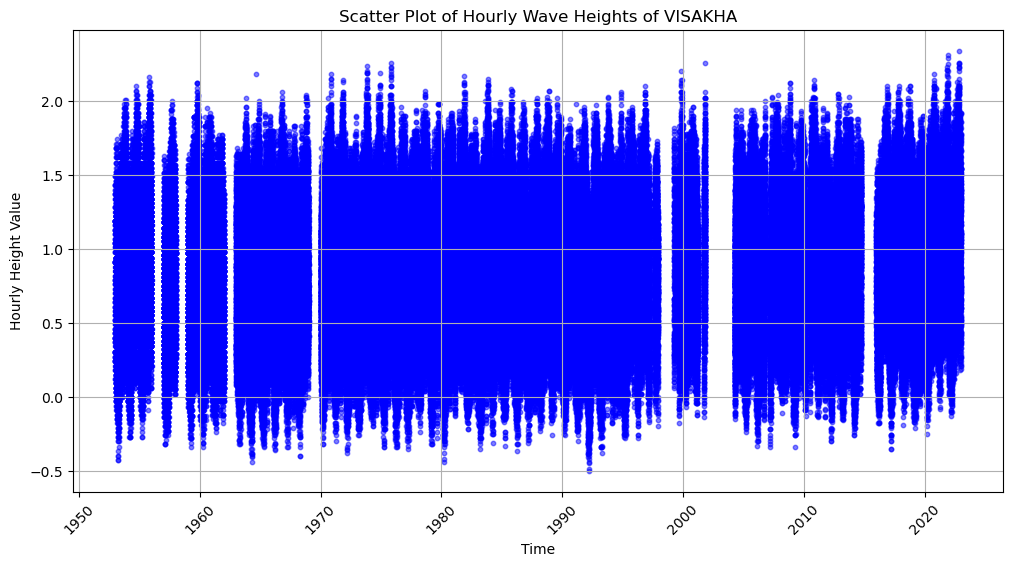

Plot saved as C:\Users\HP\Documents\GitHub\Tidal_Project\Output\wave_heights_plot_of_VISAKHA.jpg


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the processed Excel file
file_path = output_excel_path
df = pd.read_excel(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert wide format (H1, H2, ..., H24) to long format (Time, Height)
df_melted = df.melt(id_vars=['Date'], var_name='Hour', value_name='Height')

# Extract the numeric hour from column names (e.g., 'H1' -> 1, 'H24' -> 24) using slicing
df_melted['Hour'] = df_melted['Hour'].apply(lambda x: int(x[1:]) if x[1:].isdigit() else None)

# Drop any rows where the hour extraction failed
df_melted.dropna(subset=['Hour'], inplace=True)

# Create a proper timestamp column
df_melted['Timestamp'] = df_melted['Date'] + pd.to_timedelta(df_melted['Hour'] - 1, unit='h')

# Drop NaN values (if any) in the height column
df_melted.dropna(subset=['Height'], inplace=True)

# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df_melted['Timestamp'], df_melted['Height'], color='b', alpha=0.5, s=10)  # Adjust alpha & size for visibility
plt.xlabel('Time')
plt.ylabel('Hourly Height Value')
plt.title(f'Scatter Plot of Hourly Wave Heights of {port}')
plt.xticks(rotation=45)
plt.grid(True)

# Save the plot as JPEG
jpeg_file = fr'{output_path}\wave_heights_plot_of_{port}.jpg'
plt.savefig(jpeg_file, format='jpeg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved as {jpeg_file}")
